<a href="https://colab.research.google.com/github/Venture-Coding/Machine-Learning-under-Kiril-E/blob/main/Model_Selection/K_fold_cross_validation_on_svm_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Fold Cross Validation

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Since Age and Salaries, are on completely different scales and age feature might get over-shadowed. Hence, scaling them.

## Training the Kernel SVM model on the Training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Why RBF? 

Bcuz non-linear separation welcomed. Benefits of KNN but Vectors stored only during training. Not many hyperparameters to tune beside sigma(inversely related to Gamma) and C (for SVM).

## Making the Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

## Applying k-Fold Cross Validation

Which is basically creating smaller groups of training set and having a proportionally smaller test set in each group of the training set. Eg. a 1000 long training set will be divided into 10 groups of 100 entries, of which 90 can be used as train and 10 will be used as test. 

This way we avoid being lucky on just one big test set that we have separated out earlier during train_test_split, and get an idea of model is performing on unseen data even before going to the test set. (A bit similar to Random Forest's Out Of Bag score)

In [7]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


cross_val_score gives a "List" of accuracies. We then find the mean of these accs and std dev amongst the various accuracies so found.

## Visualising the Training set results

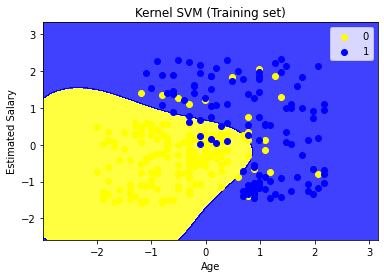

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Using 'color', instead of 'c', in new version, to avoid the warning:    

**c** *argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with* *x* & *y*.  Please use the **color** keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.

## Visualising the Test set results

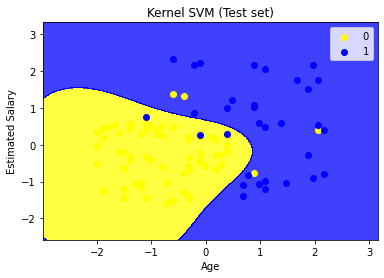

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()